In [349]:
# importing necessory libraries 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

# importing library for the data Transformation
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Michine learning models 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Model Evaluation
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#pickle 
import pickle

In [350]:
# Loading the dataset 
df = pd.read_csv('gender_classification_v7.csv')

In [351]:
# First five records 
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [352]:
# no of rows and columns in the dataframe 
df.shape 

(5001, 8)

In [353]:
# information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [354]:
# Statistical Description about the dataset 
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


### EDA 
1. Missing Value analysis 
2. Categorical Feature analysis 
3. Numerical feature analysis 
4. Distribution of Numerical features 
5. Distrubution of Categorical features 
6. Corelation Analysis 

#### MISSING VALUE ANALYSIS 

In [355]:
df.isna().sum(axis=0)

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

* There is no missing data's in the dataframe.so,no need of any kind of missing value analysis.

### Categorical feature analysis 

In [356]:
# Datatypes of each catgorical features 
df.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                        object
dtype: object

In [357]:
df['gender'].value_counts()

Female    2501
Male      2500
Name: gender, dtype: int64

* Dataset consists of only 1 categorical feature.that is also a target feature.
* Dataset given is a balanced dataset.beacuse it consisits of 2501 female and 2500 males.

In [358]:
df.groupby(['gender']).mean()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
gender,,,,,,,
Female,0.873251,12.811675,5.796321,0.114754,0.135946,0.121551,0.121551
Male,0.866000,13.551440,6.096360,0.873200,0.880000,0.864800,0.876400


* nose_wide,nose_long,lips_thin,distance_nose_to_lip_long : These features is high varying with the features.

### Numerical feature analysis

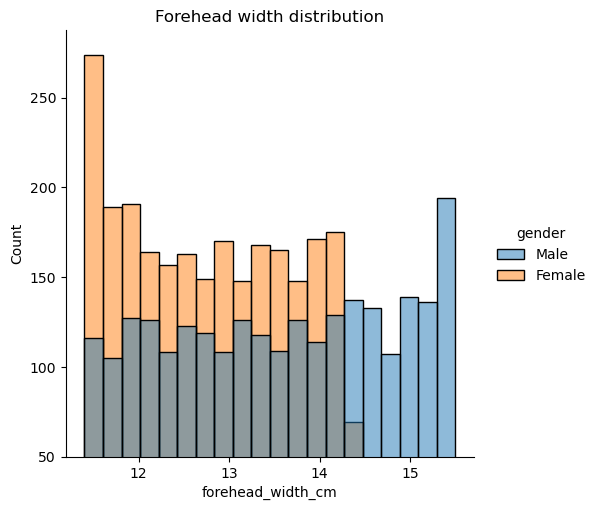

In [359]:
feature_for_analysis = ['forehead_width_cm','forehead_height_cm']

sns.displot(data = df,x='forehead_width_cm',hue = 'gender')
plt.title("Forehead width distribution")
plt.ylim(50)
plt.show()

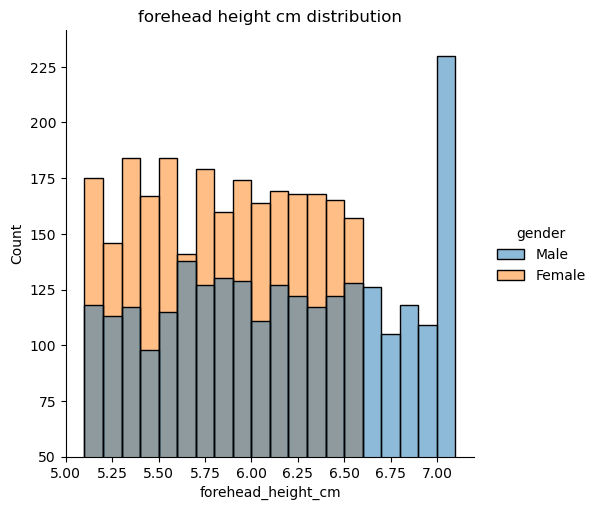

In [360]:
sns.displot(data = df,x='forehead_height_cm',hue = 'gender')
plt.title("forehead height cm distribution")
plt.ylim(50)
plt.show()

### Corelation analysis 

In [361]:
# Encoding gender feature for the analysis
gender_encoding = {'Male':0,"Female":1}

df['gender'] = df['gender'].map(gender_encoding)

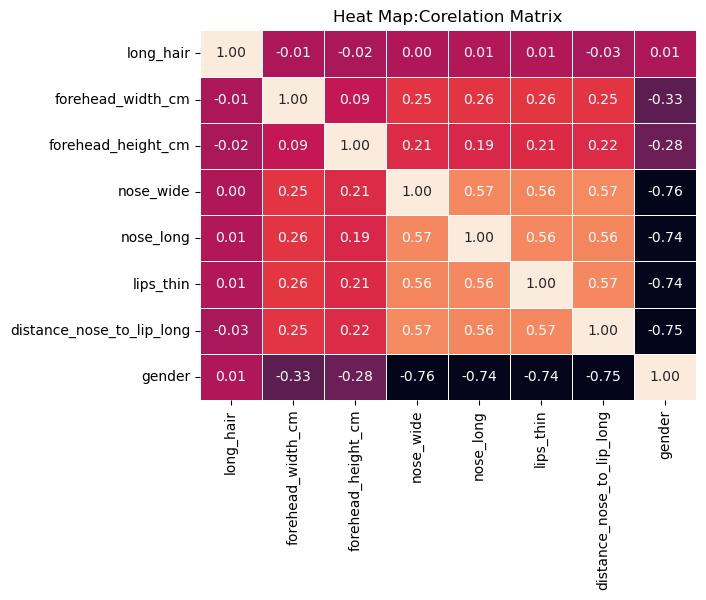

In [362]:
plt.title("Heat Map:Corelation Matrix")
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.4,cbar=False)
plt.show()

### Data transformation

scaler = MinMaxScaler(feature_range = (0,1))
for feature in ['forehead_width_cm','forehead_height_cm']:
    df[feature] = scaler.fit_transform(df[[feature]])

In [363]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,0
1,0,14.0,5.4,0,0,1,0,1
2,0,11.8,6.3,1,1,1,1,0
3,0,14.4,6.1,0,1,1,1,0
4,1,13.5,5.9,0,0,0,0,1


### Dataset Splitting

In [364]:
X = df.drop(columns=['gender'],axis=0)
y = df['gender']

In [365]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, shuffle=True,random_state=42)

In [366]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4000, 7), (1001, 7), (4000,), (1001,))

### Model training 

In [367]:
model = SVC()

In [368]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [369]:
# Code for model Evaluation
accuracy = accuracy_score(y_pred,y_test)
class_report = classification_report(y_pred,y_test)
conf_matrix = confusion_matrix(y_pred,y_test)

In [370]:
print("Confusion Matrix:")
print(conf_matrix)

print("\nAccuracy Score:")
print(accuracy)

print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[479  16]
 [ 20 486]]

Accuracy Score:
0.964035964035964

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       495
           1       0.97      0.96      0.96       506

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



In [371]:
with open('genderclassification.pkl', 'wb') as file:
    pickle.dump(model, file)

In [372]:
with open('genderclassification.pkl', 'rb') as file:
    genderclass_model = pickle.load(file)

In [382]:
long_hair = int(input("Enter (longhair): yes(1) or no(0): "))
fore_head_width = float(input("Enter head width in cm: "))
fore_head_length = float(input("Enter head length in cm: "))
nose_wide = int(input("Enter (nose_wide): yes(1) or no(0): "))
nose_long = int(input("Enter (nose_long): yes(1) or no(0): "))
lips_thin = int(input("Enter (lips_thin): yes(1) or no(0): "))
distance_nose_to_lip_long = int(input("Enter (distance_nose_to_lip_long): yes(1) or no(0): "))

Enter (longhair): yes(1) or no(0): 0
Enter head width in cm: 14
Enter head length in cm: 5.4
Enter (nose_wide): yes(1) or no(0): 0
Enter (nose_long): yes(1) or no(0): 0
Enter (lips_thin): yes(1) or no(0): 1
Enter (distance_nose_to_lip_long): yes(1) or no(0): 0


In [383]:
pred_label = genderclass_model.predict([[long_hair,fore_head_width,fore_head_length,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long]])

/Users/vyshnavkrishna/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [384]:
if pred_label == 0:
    print("Predicted as MALE")
else:
    print("predicted as FEMALE")

predicted as FEMALE
